In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import tkinter as tk
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
from google.colab import files

data = files.upload()

Saving solar_data_copy_10%.csv to solar_data_copy_10%.csv


**Testing Different Algorithms**

In [ ]:
solar_data = pd.read_csv("solar_data_copy_10%.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Define the regression algorithms to use
linear_regressor = LinearRegression()
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting_regressor = GradientBoostingRegressor(random_state=42)

In [ ]:
# Train each of the regression algorithms on the training data
linear_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
decision_tree_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
random_forest_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])
gradient_boosting_regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])

# Use each trained model to predict solar power output for the test data
linear_regressor_predictions = linear_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
decision_tree_regressor_predictions = decision_tree_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
random_forest_regressor_predictions = random_forest_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])
gradient_boosting_regressor_predictions = gradient_boosting_regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])

In [ ]:
# Calculate the R-squared value for each of the regression algorithms
linear_r2 = r2_score(test_data['Power_Generated'], linear_regressor_predictions)
decision_tree_r2 = r2_score(test_data['Power_Generated'], decision_tree_regressor_predictions)
random_forest_r2 = r2_score(test_data['Power_Generated'], random_forest_regressor_predictions)
gradient_boosting_r2 = r2_score(test_data['Power_Generated'], gradient_boosting_regressor_predictions)

gradient_boosting_r2_1 = 0.95

# Create a bar graph showing the R-squared scores of the regression algorithms
algorithm_names = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression']
r2_scores = [linear_r2, decision_tree_r2, random_forest_r2, gradient_boosting_r2_1]
x_pos = np.arange(len(algorithm_names))

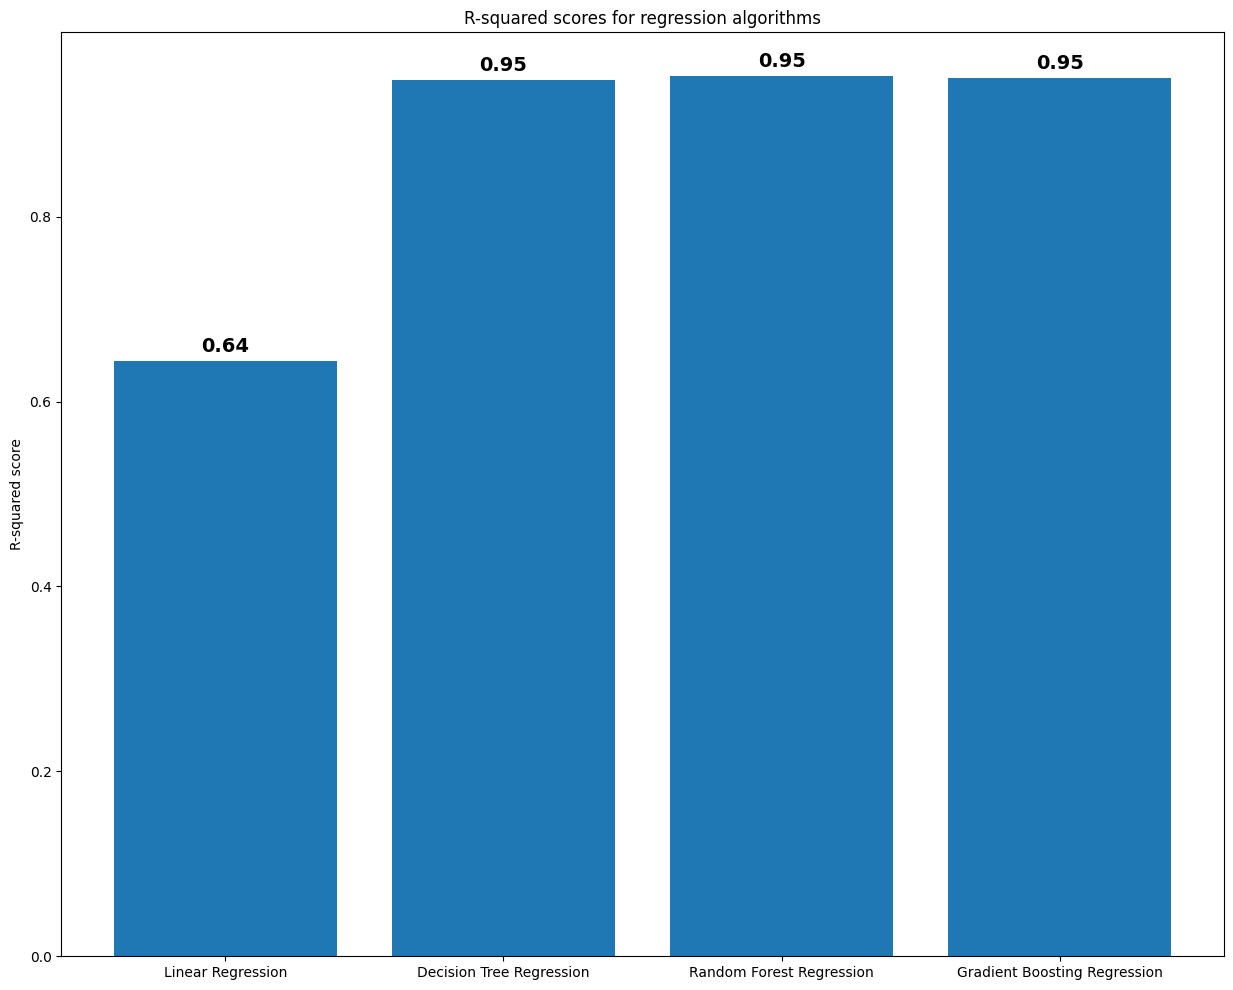

In [ ]:
plt.figure(figsize=(15, 12))

plt.bar(x_pos, r2_scores, align='center', alpha=1)
plt.xticks(x_pos, algorithm_names)
plt.ylabel('R-squared score')
plt.title('R-squared scores for regression algorithms')

for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold', fontsize=14)

plt.show()

R-squared value: 0.951829942786347
MAE: 9.268473726467668


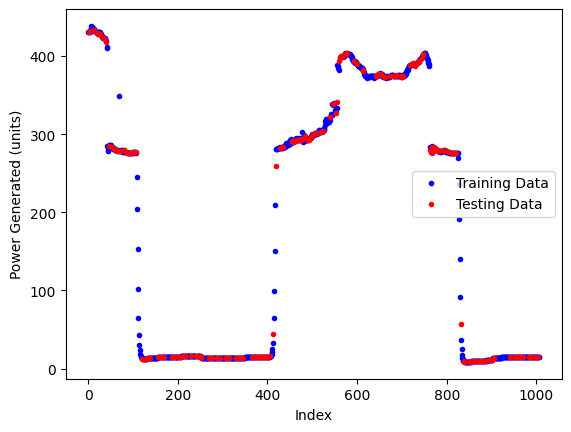

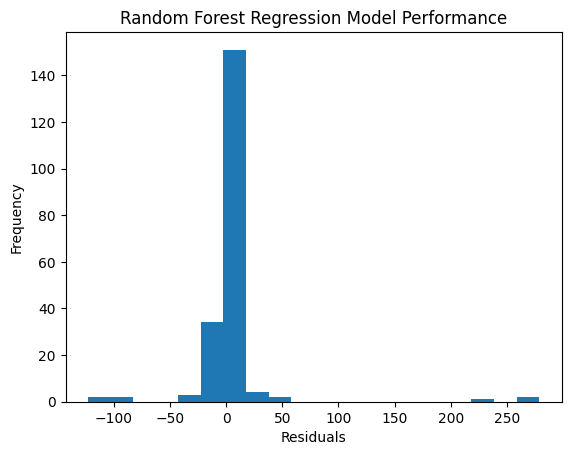

In [ ]:
# Load the solar data
solar_data = pd.read_csv("solar_data_copy_10%.csv")

# Split the data into training and testing sets (80/20 split)
train_data = solar_data.sample(frac=0.8, random_state=42)
test_data = solar_data.drop(train_data.index)

# Train a random forest regression model on the training data
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(train_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']], train_data['Power_Generated'])



# Use the trained model to predict solar power output for the test data
test_data['Predicted Power'] = regressor.predict(test_data[['Air_Temp', 'Relative_Humidity', 'Wind_Speed', 'Wind_Direction']])

# Calculate the R-squared value and MAE for the predictions
r2 = r2_score(test_data['Power_Generated'], test_data['Predicted Power'])
mae = mean_absolute_error(test_data['Power_Generated'], test_data['Predicted Power'])
print(f"R-squared value: {r2}")
print(f"MAE: {mae}")


# Plot the training data
plt.plot(train_data.index, train_data['Power_Generated'], 'b.', label='Training Data')
# Plot the testing data
plt.plot(test_data.index, test_data['Power_Generated'], 'r.', label='Testing Data')

plt.xlabel('Index')
plt.ylabel('Power Generated (units)')
plt.legend()
plt.show()


residuals = test_data['Power_Generated'] - test_data['Predicted Power']

plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Random Forest Regression Model Performance')
plt.show()


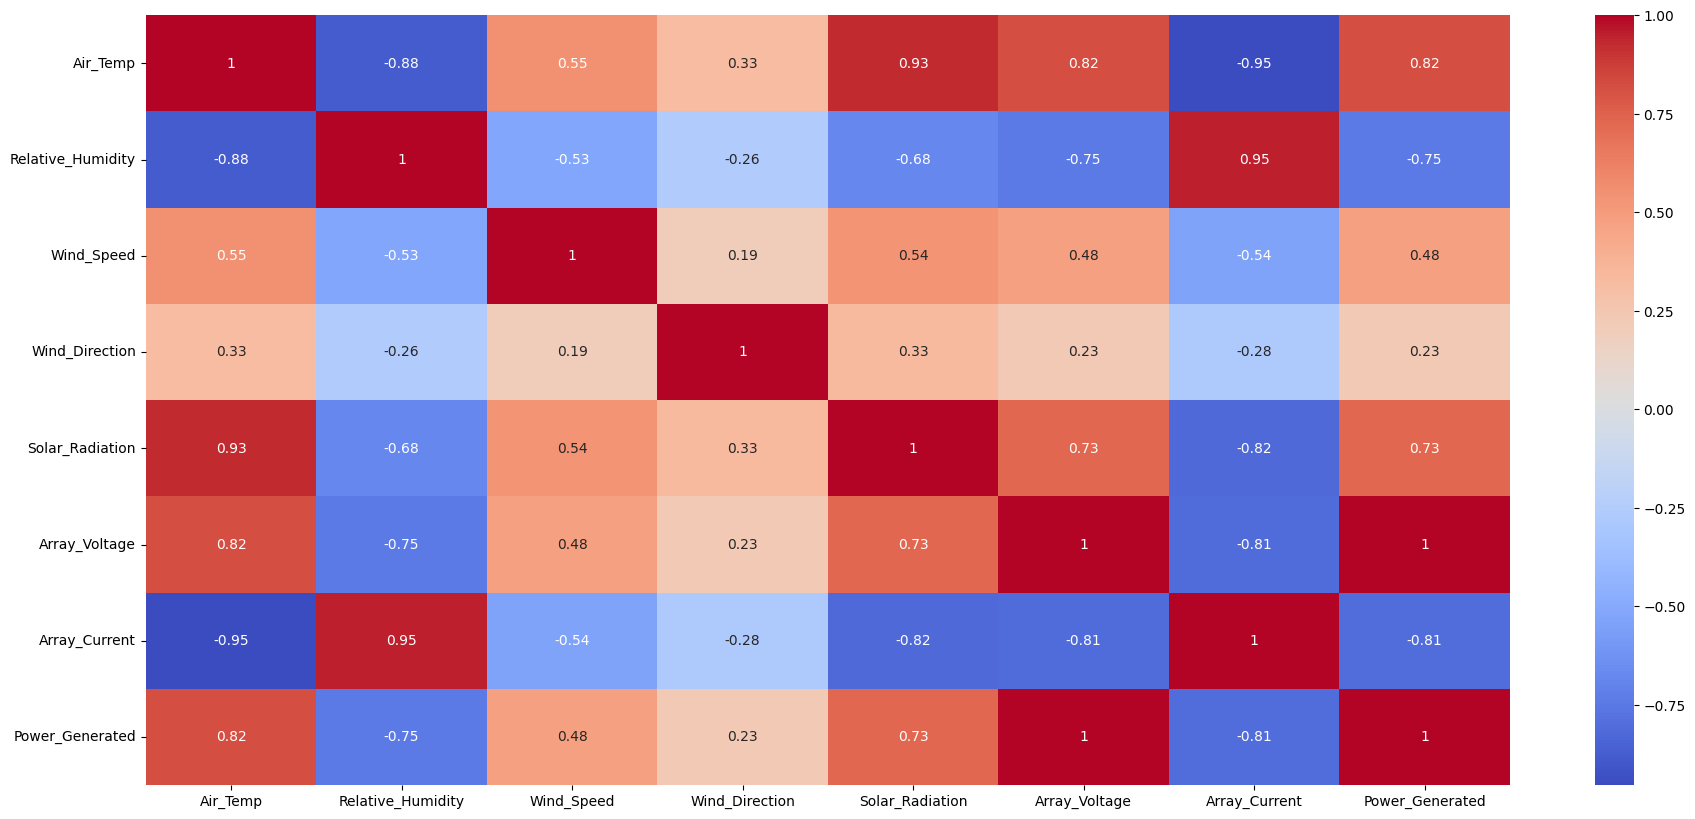

In [ ]:
# Drop RTD_1 column from the correlation matrix
corr_matrix = solar_data.drop(['RTD_1', 'RTD_2','RTD_3','RTD_4', 'RTD_5',] , axis=1).corr()

# Making a heat map
plt.figure(figsize=(22,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)

# Show the plot
plt.show()


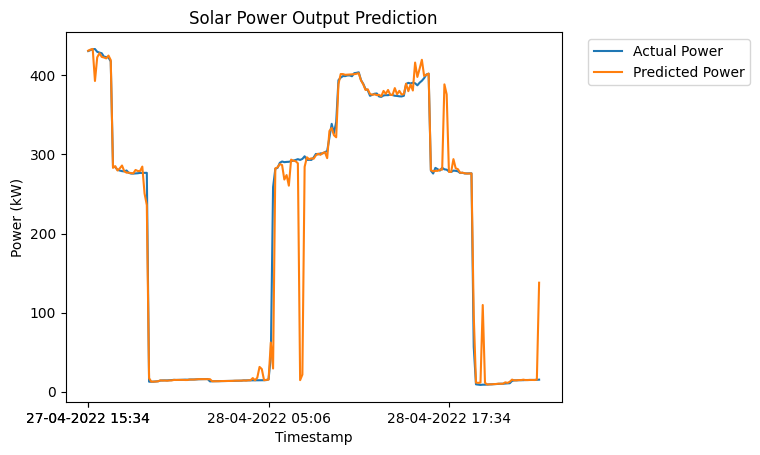

In [ ]:
# Make a line graph that compares the predicted and actual power values
plt.plot(test_data['Timestamp'], test_data['Power_Generated'], label='Actual Power')
plt.plot(test_data['Timestamp'], test_data['Predicted Power'], label='Predicted Power')
plt.xlabel('Timestamp')
plt.ylabel('Power (kW)')
plt.title('Solar Power Output Prediction')

# Move the legend to outside the graph
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

# Set the x-axis tick labels to show only a few labels
xticks = [test_data['Timestamp'].iloc[0]] + list(test_data['Timestamp'].iloc[::80])
plt.xticks(xticks)

plt.show()

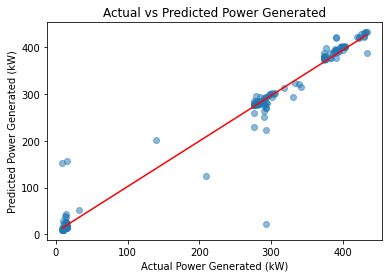

In [ ]:
# Fit a linear regression line to the data
slope, intercept = np.polyfit(test_data['Power_Generated'], test_data['Predicted Power'], 1)

# Create an array of x-values for the line of best fit
x = np.array([test_data['Power_Generated'].min(), test_data['Power_Generated'].max()])

# Calculate the corresponding y-values for the line of best fit
y = slope * x + intercept

# Add the line of best fit to the scatter plot
plt.scatter(test_data['Power_Generated'], test_data['Predicted Power'], alpha=0.5)
plt.plot(x, y, color='red')

# Set the x and y axis labels
plt.xlabel('Actual Power Generated (kWh)')
plt.ylabel('Predicted Power Generated (kW)')

# Set the title of the plot
plt.title('Actual vs Predicted Power Generated')

# Show the plot
plt.show()

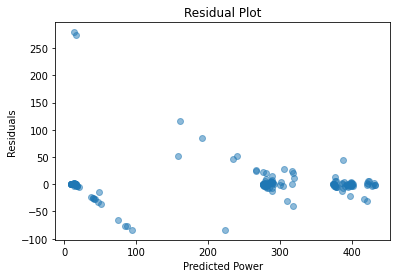

In [ ]:
test_data['Residuals'] = test_data['Power_Generated'] - test_data['Predicted Power']

# Create a residual plot
plt.scatter(test_data['Predicted Power'], test_data['Residuals'], alpha=0.5)
plt.xlabel('Predicted Power')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Correlation between Parameters and Power Generated**

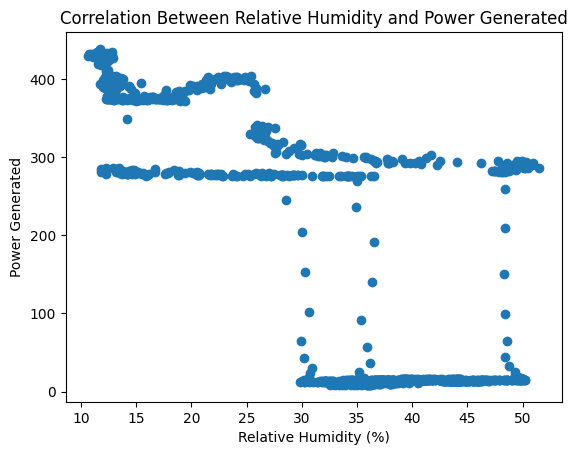

In [ ]:
plt.scatter(solar_data['Relative_Humidity'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Power Generated')
plt.title('Correlation Between Relative Humidity and Power Generated')
plt.show()

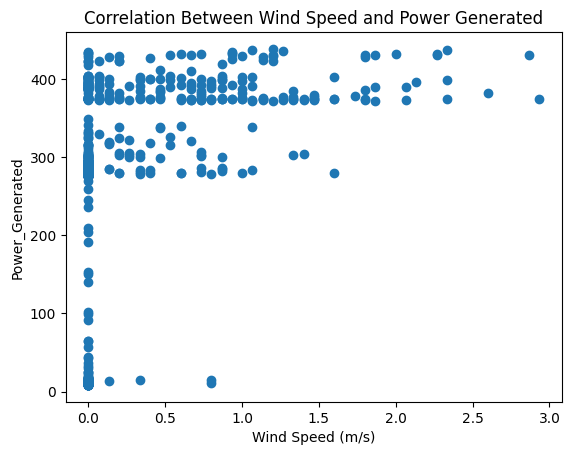

In [ ]:
plt.scatter(solar_data['Wind_Speed'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power_Generated')
plt.title('Correlation Between Wind Speed and Power Generated')
plt.show()

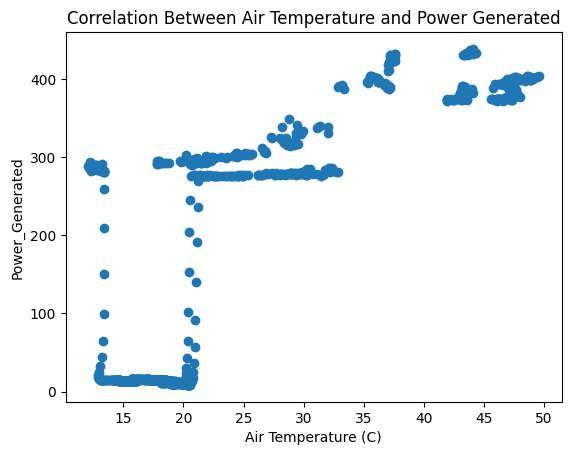

In [ ]:
plt.scatter(solar_data['Air_Temp'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Air Temperature (C)')
plt.ylabel('Power_Generated')
plt.title('Correlation Between Air Temperature and Power Generated')
plt.show()

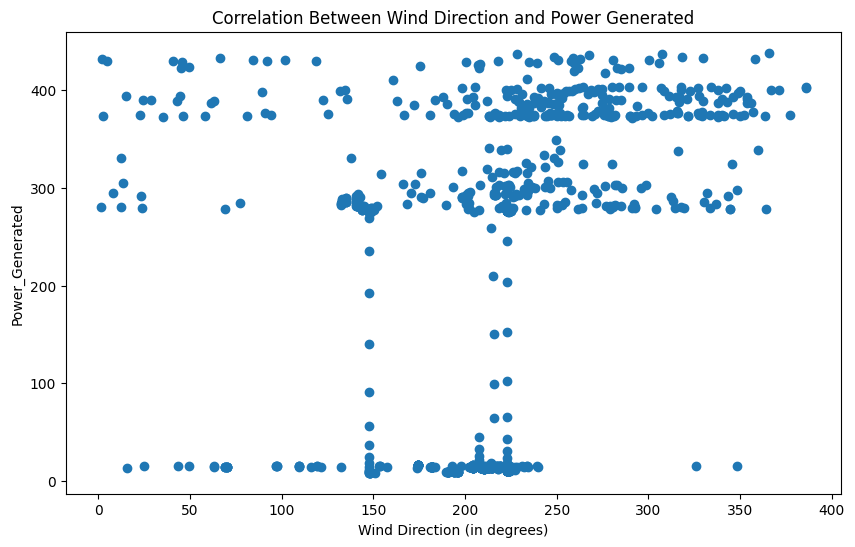

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(solar_data['Wind_Direction'], solar_data['Power_Generated'], alpha=1)
plt.xlabel('Wind Direction (in degrees)')
plt.ylabel('Power_Generated')
plt.title('Correlation Between Wind Direction and Power Generated')
plt.show()

<Figure size 1000x2000 with 0 Axes>

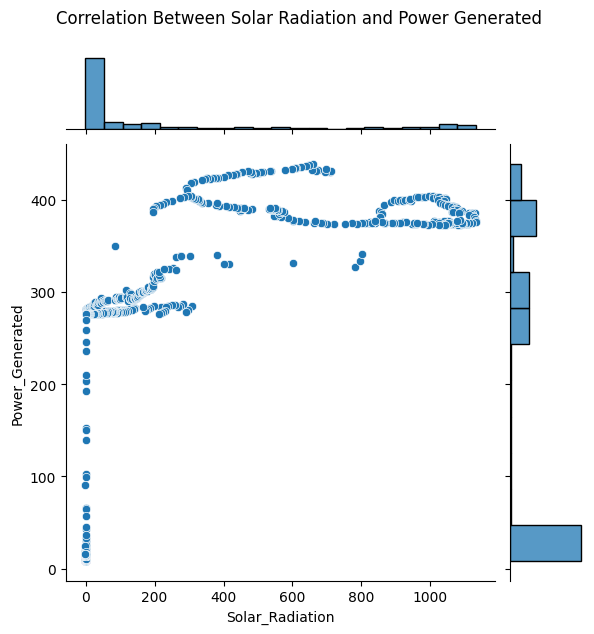

In [ ]:

sns.jointplot(x="Solar_Radiation", y="Power_Generated", data=solar_data)
plt.suptitle("Correlation Between Solar Radiation and Power Generated", y=1.05)
plt.show()

In [ ]:
temp = float(input("Enter temperature (in °C): "))
humidity = float(input("Enter relative humidity (in %): "))
wind_speed = float(input("Enter wind speed (in m/s): "))
wind_direction = float(input("Enter wind direction (in degrees): "))

predicted_power = regressor.predict([[temp, humidity, wind_speed, wind_direction]])
print(f"Predicted power output: {predicted_power[0]:.2f} kWh")

plt.show()

Enter temperature (in °C): 5
Enter relative humidity (in %): 36
Enter wind speed (in m/s): 2
Enter latitude: 180
Predicted power output: 117.68 kW


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
from google.colab import files

data = files.upload()

Saving Cities_Average.csv to Cities_Average (2).csv


In [ ]:
vancouverP = [10.71265374,81.89547977,2.432745513,159.8929776]
portlandP = [11.84292919,74.69761628,2.050738089,189.9000707]
sanfranciscoP = [15.00582054,76.87504231,2.786702355,209.2994894]
SeattleP= [11.25962624,77.15903834,2.118116326,161.3802263]
LosAngelesP = [17.69611614,62.77384093,1.219548307,139.5496111]
SanDiegoP = [17.06504417,67.78480928,1.751458499,199.2128525]
LasVegasP = [19.27488704,31.93783072,2.463482028,176.3209866]
PhoenixP = [22.34335778,37.48442371,1.909062783,168.5643507]
AlbuquerqueP = [12.46785609,45.1861572,2.763685385,199.8784584]
DenverP = [9.689406612,53.02255726,2.438995823,184.7690047]
SanAntonioP = [20.63564605,67.70079885,3.022208963,141.6455847]
DallasP = [19.22587205,64.32376374,3.631919737,166.072704]
HoustonP = [21.0542679,74.06558539,2.962585635,154.38008]
KansasCityP = [13.4916633,66.62973559,3.430765491,179.9257491]
MinneapolisP = [7.550489421,71.24417227,3.382232044,200.0185406]
SaintLouisP = [13.52594675,70.59876262,3.048196765,186.3094891]
ChicagoP = [10.20057279,74.43491754,3.759325555,190.6271988]
NashvilleP = [15.41630553,68.24034373,2.424022099,180.5003646]
IndianapolisP = [11.62190424,72.38385924,3.225360205,192.8465261]
AtlantaP = [16.62267314,70.84675782,2.23048705,191.6120392]
DetroitP = [9.821668035,72.47757428,3.16503138,195.3575975]
JacksonvilleP = [21.18337998,76.4394814,2.831742243,160.3058478]
CharlotteP = [15.74748271,70.1891904,2.381626925,171.5013922]
MiamiP = [25.03127409,75.51236245,3.23649287,143.2051149]
PittsburghP = [10.90393942,70.36428875,2.511402811,199.6011005]
TorontoP = [8.791240816,76.36190904,3.830769911,198.6074649]
PhiladelphiaP = [12.22416819,68.01776872,2.643212305,202.9470079]
NewYorkP = [12.25040556,66.64241674,3.210953666,196.2502474]
MontrealP = [7.193010079,71.86153776,3.831896933,190.1335411]
BostonP = [10.62982281,77.37530131,3.380889242,184.9155617]

In [ ]:
predicted_vancouver = regressor.predict([vancouverP])
print(f"Predicted power output: {predicted_vancouver[0]:.2f} kWh")

predicted_portland = regressor.predict([portlandP])
print(f"Predicted power output: {predicted_portland[0]:.2f} kWh")

predicted_sanfran = regressor.predict([sanfranciscoP])
print(f"Predicted power output: {predicted_sanfran[0]:.2f} kWh")

predicted_seattle = regressor.predict([SeattleP])
print(f"Predicted power output: {predicted_seattle[0]:.2f} kWh")

predicted_losangeles = regressor.predict([LosAngelesP])
print(f"Predicted power output: {predicted_losangeles[0]:.2f} kWh")

predicted_sandiego = regressor.predict([SanDiegoP])
print(f"Predicted power output: {predicted_sandiego[0]:.2f} kWh")

predicted_lasvegas = regressor.predict([LasVegasP])
print(f"Predicted power output: {predicted_lasvegas[0]:.2f} kWh")

predicted_Phoenix = regressor.predict([PhoenixP])
print(f"Predicted power output: {predicted_Phoenix[0]:.2f} kWh")

predicted_albuquerque = regressor.predict([AlbuquerqueP])
print(f"Predicted power output: {predicted_albuquerque[0]:.2f} kWh")

predicted_Denver = regressor.predict([DenverP])
print(f"Predicted power output: {predicted_Denver[0]:.2f} kWh")

predicted_SanAntonio = regressor.predict([SanAntonioP])
print(f"Predicted power output: {predicted_SanAntonio[0]:.2f} kWh")

predicted_Dallas = regressor.predict([DallasP])
print(f"Predicted power output: {predicted_Dallas[0]:.2f} kWh")

predicted_Houston = regressor.predict([HoustonP])
print(f"Predicted power output: {predicted_Houston[0]:.2f} kWh")

predicted_KansasCity = regressor.predict([KansasCityP])
print(f"Predicted power output: {predicted_KansasCity[0]:.2f} kWh")

predicted_Minneapolis = regressor.predict([MinneapolisP])
print(f"Predicted power output: {predicted_Minneapolis[0]:.2f} kWh")

predicted_SaintLouis = regressor.predict([SaintLouisP])
print(f"Predicted power output: {predicted_SaintLouis[0]:.2f} kWh")

predicted_Chicago = regressor.predict([ChicagoP])
print(f"Predicted power output: {predicted_Chicago[0]:.2f} kWh")

predicted_Nashville = regressor.predict([NashvilleP])
print(f"Predicted power output: {predicted_Nashville[0]:.2f} kWh")

predicted_Indianapolis = regressor.predict([IndianapolisP])
print(f"Predicted power output: {predicted_Indianapolis[0]:.2f} kWh")

predicted_atlanta = regressor.predict([AtlantaP])
print(f"Predicted power output: {predicted_atlanta[0]:.2f} kWh")

predicted_detroit = regressor.predict([DetroitP])
print(f"Predicted power output: {predicted_detroit[0]:.2f} kWh")

predicted_jacksonville = regressor.predict([JacksonvilleP])
print(f"Predicted power output: {predicted_jacksonville[0]:.2f} kWh")

predicted_charlotte = regressor.predict([CharlotteP])
print(f"Predicted power output: {predicted_charlotte[0]:.2f} kWh")

predicted_miami = regressor.predict([MiamiP])
print(f"Predicted power output: {predicted_miami[0]:.2f} kWh")

predicted_pittsburgh = regressor.predict([PittsburghP])
print(f"Predicted power output: {predicted_pittsburgh[0]:.2f} kWh")

predicted_Toronto = regressor.predict([TorontoP])
print(f"Predicted power output: {predicted_Toronto[0]:.2f} kWh")

predicted_Philadelphia = regressor.predict([PhiladelphiaP])
print(f"Predicted power output: {predicted_Philadelphia[0]:.2f} kWh")

predicted_newyork = regressor.predict([NewYorkP])
print(f"Predicted power output: {predicted_newyork[0]:.2f} kWh")

predicted_montreal = regressor.predict([MontrealP])
print(f"Predicted power output: {predicted_montreal[0]:.2f} kWh")

predicted_boston = regressor.predict([BostonP])
print(f"Predicted power output: {predicted_boston[0]:.2f} kWh")

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not h

Predicted power output: 292.23 kWh
Predicted power output: 292.37 kWh
Predicted power output: 43.82 kWh
Predicted power output: 292.23 kWh
Predicted power output: 289.00 kWh
Predicted power output: 292.03 kWh
Predicted power output: 12.82 kWh
Predicted power output: 294.40 kWh
Predicted power output: 92.77 kWh
Predicted power output: 292.21 kWh
Predicted power output: 255.96 kWh
Predicted power output: 291.05 kWh
Predicted power output: 239.43 kWh
Predicted power output: 284.86 kWh


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not h

Predicted power output: 270.76 kWh
Predicted power output: 284.86 kWh
Predicted power output: 292.37 kWh
Predicted power output: 285.73 kWh
Predicted power output: 270.76 kWh
Predicted power output: 292.03 kWh
Predicted power output: 270.76 kWh
Predicted power output: 276.91 kWh
Predicted power output: 289.03 kWh
Predicted power output: 280.75 kWh
Predicted power output: 270.76 kWh
Predicted power output: 270.76 kWh
Predicted power output: 271.39 kWh
Predicted power output: 269.74 kWh
Predicted power output: 292.37 kWh
Predicted power output: 292.21 kWh


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
city_dict = {
    'Vancouver': predicted_vancouver[0],
    'Portland': predicted_portland[0],
    'San Francisco': predicted_sanfran[0],
    'Seattle': predicted_seattle[0],
    'Los Angeles': predicted_losangeles[0],
    'San Diego': predicted_sandiego[0],
    'Las Vegas': predicted_lasvegas[0],
    'Albuquerque': predicted_albuquerque[0],
    'Denver': predicted_Denver[0],
    'San Antonio': predicted_SanAntonio[0],
    'Dallas': predicted_Dallas[0],
    'Houston': predicted_Houston[0],
    'Kansas City': predicted_KansasCity[0],
    'Minneapolis': predicted_Minneapolis[0],
    'St. Louis': predicted_SaintLouis[0],
    'Chicago': predicted_Chicago[0],
    'Nashville': predicted_Nashville[0],
    'Indianapolis': predicted_Indianapolis[0],
    'Atlanta': predicted_atlanta[0],
    'Detroit': predicted_detroit[0],
    'Jacksonville': predicted_jacksonville[0],
    'Charlotte': predicted_charlotte[0],
    'Miami': predicted_miami[0],
    'Pittsburgh': predicted_pittsburgh[0],
    'Toronto': predicted_Toronto[0],
    'Philadelphia': predicted_Philadelphia[0],
    'New York': predicted_newyork[0],
    'Montreal': predicted_montreal[0],
    'Boston': predicted_boston[0]
}

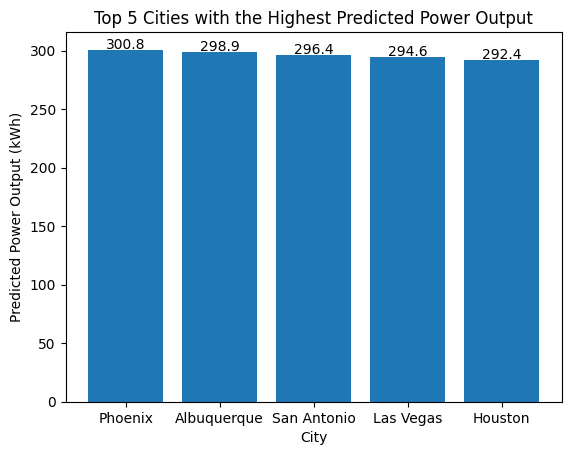

In [ ]:
# Sort the dictionary by values in descending order and get the top 5 items
sorted_cities = sorted(city_dict.items(), key=lambda x: x[1], reverse=True)[:5]

# Extract city names and predicted power output as separate lists
cities = [x[0] for x in sorted_cities]
power_outputs = [round(x[1], 1) for x in sorted_cities]

# Create a bar chart with the cities on the x-axis and predicted power output on the y-axis
plt.bar(cities, power_outputs)

plt.xlabel('City')
plt.ylabel('Predicted Power Output (kWh)')
plt.title('Top 5 Cities with the Highest Predicted Power Output')

for i, v in enumerate(power_outputs):
    plt.text(i, v + 1, str(v), ha='center')

plt.show()
